<a href="https://colab.research.google.com/github/JuliaSchneider01/Algo/blob/main/sorting_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook zu Blatt 8

In [9]:
!pip install numpy seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np      # um zufällige arrays zu generieren
import time             # zur zeitmessung
import seaborn as sns   # zum plotten

####  1. Implementieren Sie Selection Sort und Quicksort in Python

In [11]:
def selectionSort(array):
    # Iterate through the list
    for i in range(len(array)):
        # Find the minimum element in the unsorted sublist
        min_index = i
        for j in range(i+1, len(array)):
            if array[min_index] > array[j]:
                min_index = j
        # Swap the minimum element with the first element of the unsorted sublist
        array[i], array[min_index] = array[min_index], array[i]
    return array

In [7]:
array = [7,5,8,1] 
selectionSort(array)
print(array) # das sortierte array

[1, 5, 8, 7]


In [12]:
def quickSort(array):
    if len(array) <= 1:
        return array
    pivot = array[len(array) // 2]
    left = [x for x in array if x < pivot]
    middle = [x for x in array if x == pivot]
    right = [x for x in array if x > pivot]
    return quickSort(left) + middle + quickSort(right)

In [5]:
array = [7,5,8,1] 
quickSort(array)
print(array) # das sortierte array

[7, 5, 8, 1]


#### 4. Testen Sie die Korrektheit Ihrer Implementierungen anhand von verschiedenen Testfällen

In [13]:
# Hier kommen die Testfälle!
#quickSort
#selectionSort
array1 = [1,2,3,4] 
quickSort(array1)
print(array1) # das sortierte array
array2 = [4,3,2,1] 
quickSort(array2)
print(array2) # das sortierte array
array3 = [1] 
quickSort(array3)
print(array3) # das sortierte array
array4 = [] 
quickSort(array4)
print(array4) # das sortierte array

#selectionSort
array1 = [1,2,3,4] 
selectionSort(array1)
print(array1) # das sortierte array
array2 = [4,3,2,1] 
selectionSort(array2)
print(array2) # das sortierte array
array3 = [1] 
selectionSort(array3)
print(array3) # das sortierte array
array4 = [] 
selectionSort(array4)
print(array4) # das sortierte array

[1, 2, 3, 4]
[4, 3, 2, 1]
[1]
[]
[1, 2, 3, 4]
[1, 2, 3, 4]
[1]
[]


#### 5. Messen Sie die Laufzeit der beiden Sortieralgorithmen auf Ihrem Rechner.

In [14]:
from numpy.core.arrayprint import array2string
s_times, q_times = [], []
arrar_sizes =  [10, 100, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000] # messung für verschiedenen array-längen
for size in arrar_sizes:
    # ziehe ein zufälliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 
    start = time.time()
    # hier sortieren mit selection sort - wie geht das?
    sorted_array = selectionSort(array)
    end = time.time()
    # Calculate the time taken to sort the array
    s_time = end - start
    s_times.append(s_time) # die zeit in sekunden
    # Sort the array using quicksort and measure the time taken
    start = time.time()
    sorted_array = quickSort(array)
    end = time.time()
    q_time = end - start
    q_times.append(q_time)

    
  

#### 6. Erstellen Sie einen geeignent Plot, der die Laufzeit der beiden Algorithmen in Abhängigkeit von der Eingabelänge darstellt

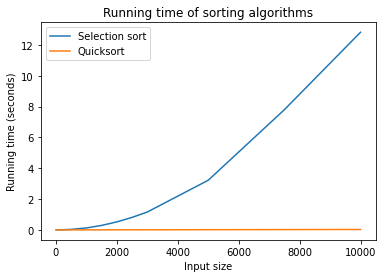

In [15]:
import matplotlib.pyplot as plt

# Plot the running times for selection sort and quicksort
plt.plot(arrar_sizes, s_times, label="Selection sort")
plt.plot(arrar_sizes, q_times, label="Quicksort")

# Add axis labels and a title
plt.xlabel("Input size")
plt.ylabel("Running time (seconds)")
plt.title("Running time of sorting algorithms")

# Add a legend
plt.legend()

# Show the plot
plt.show()

#### 7. Erstellen Sie für die beiden Sortieralgorithmen jeweils einen Plot, in dem gemessene Laufzeit durch die entsprechende asymptotische Laufzeitentwicklung approximiert wird.

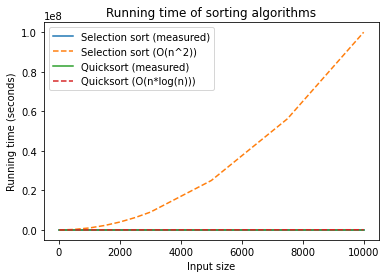

Selection sort constant (C): 1.3063329966926718e-07
Quicksort constant (C): 3.2192954926570855e-07


In [16]:
# Hier kommen die Plots!
# Generate points for the O(n^2) curve
n_values = np.array(arrar_sizes)
o_n2_values = n_values**2

# Generate points for the O(n*log(n)) curve
o_nlog_values = n_values*np.log(n_values)

# Plot the measured running times and the asymptotic running time curves
plt.plot(arrar_sizes, s_times, label="Selection sort (measured)")
plt.plot(arrar_sizes, o_n2_values, "--", label="Selection sort (O(n^2))")
plt.plot(arrar_sizes, q_times, label="Quicksort (measured)")
plt.plot(arrar_sizes, o_nlog_values, "--", label="Quicksort (O(n*log(n)))")

# Add axis labels and a title
plt.xlabel("Input size")
plt.ylabel("Running time (seconds)")
plt.title("Running time of sorting algorithms")

# Add a legend
plt.legend()

# Show the plot
plt.show()



from scipy.optimize import curve_fit

def o_n2(n, C):
    return C*n**2

def o_nlog(n, C):
    return C*n*np.log(n)

# Fit an O(n^2) curve to the selection sort running times
params, params_covariance = curve_fit(o_n2, arrar_sizes, s_times)
print("Selection sort constant (C):", params[0])

# Fit an O(n*log(n)) curve to the quicksort running times
params, params_covariance = curve_fit(o_nlog, arrar_sizes, q_times)
print("Quicksort constant (C):", params[0])

#### 8. Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit der nativen sort() Funktion für Listen in Python

In [30]:
# Hier kommt eure Laufzeitanalyse!
